In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
co2 = pd.read_csv("Datasets/annual-co2-emissions-per-country.csv")
co2.head()

Entity Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0

In [3]:
population = pd.read_csv("Datasets/population.csv")
population.head()

Entity  Year  Population - Sex: all - Age: all - Variant: estimates
0  Afghanistan  1950                                            7776182    
1  Afghanistan  1951                                            7879343    
2  Afghanistan  1952                                            7987783    
3  Afghanistan  1953                                            8096703    
4  Afghanistan  1954                                            8207953

In [4]:
# Merge the two dataframes based on Country and Year
merged_df = pd.merge(aco2, population, on=['Entity', 'Year'], how='inner')

# Filter for the last 30 years 
# Replace 2023 with the latest available year in your dataset
latest_year = merged_df['Year'].max()
start_year = latest_year - 29
filtered_df = merged_df[(merged_df['Year'] >= start_year) & (merged_df['Year'] <= latest_year)]

# Display the resulting DataFrame
filtered_df.head()

Entity Code  Year  Annual CO₂ emissions  \
44  Afghanistan  AFG  1994             1453829.0   
45  Afghanistan  AFG  1995             1417327.0   
46  Afghanistan  AFG  1996             1370104.0   
47  Afghanistan  AFG  1997             1304152.0   
48  Afghanistan  AFG  1998             1278504.0   

    Population - Sex: all - Age: all - Variant: estimates  
44                                           16250799      
45                                           17065836      
46                                           17763265      
47                                           18452100      
48                                           19159996

In [21]:
# Calculate the new column 'CO2 per capita'
filtered_df['CO2 per capita'] = filtered_df['Annual CO₂ emissions'] / filtered_df['Population - Sex: all - Age: all - Variant: estimates']

# Display the resulting DataFrame
filtered_df.head()

C:\Users\90543\AppData\Local\Temp\ipykernel_24108\380483304.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Entity Code  Year  Annual CO₂ emissions  \
44  Afghanistan  AFG  1994             1453829.0   
45  Afghanistan  AFG  1995             1417327.0   
46  Afghanistan  AFG  1996             1370104.0   
47  Afghanistan  AFG  1997             1304152.0   
48  Afghanistan  AFG  1998             1278504.0   

    Population - Sex: all - Age: all - Variant: estimates  CO2 per capita  
44                                           16250799            0.089462  
45                                           17065836            0.083051  
46                                           17763265            0.077131  
47                                           18452100            0.070678  
48                                           19159996            0.066728

In [4]:
er = pd.read_csv("Datasets/electricity-renewables.csv")
er.head()

Entity Code  Year  Electricity from renewables - TWh
0  ASEAN (Ember)  NaN  2000                              73.25
1  ASEAN (Ember)  NaN  2001                              77.19
2  ASEAN (Ember)  NaN  2002                              76.52
3  ASEAN (Ember)  NaN  2003                              76.40
4  ASEAN (Ember)  NaN  2004                              77.96

In [5]:
eg = pd.read_csv("Datasets/electricity-generation.csv")
eg.head()

Entity Code  Year  Electricity generation - TWh
0  ASEAN (Ember)  NaN  2000                        378.61
1  ASEAN (Ember)  NaN  2001                        404.85
2  ASEAN (Ember)  NaN  2002                        433.19
3  ASEAN (Ember)  NaN  2003                        458.24
4  ASEAN (Ember)  NaN  2004                        496.56

In [7]:
# Merge the electricity generation and renewable energy dataframes
merged_electricity = pd.merge(eg, er, on=['Entity', 'Year', 'Code'], how='inner')

# Filter for the last 30 years
latest_year = merged_electricity['Year'].max()
start_year = latest_year - 29
filtered_electricity = merged_electricity[(merged_electricity['Year'] >= start_year) & (merged_electricity['Year'] <= latest_year)]

# Select relevant columns
filtered_electricity = filtered_electricity[['Year', 'Code', 'Entity', 'Electricity generation - TWh', 'Electricity from renewables - TWh']]

# Display the resulting DataFrame
filtered_electricity.head()

Year Code         Entity  Electricity generation - TWh  \
0  2000  NaN  ASEAN (Ember)                        378.61   
1  2001  NaN  ASEAN (Ember)                        404.85   
2  2002  NaN  ASEAN (Ember)                        433.19   
3  2003  NaN  ASEAN (Ember)                        458.24   
4  2004  NaN  ASEAN (Ember)                        496.56   

   Electricity from renewables - TWh  
0                              73.25  
1                              77.19  
2                              76.52  
3                              76.40  
4                              77.96

In [15]:
# Calculate the ratio
filtered_electricity['Ratio'] = filtered_electricity['Electricity from renewables - TWh'] / filtered_electricity['Electricity generation - TWh']

# Display the resulting DataFrame
filtered_electricity.head()

Year Code         Entity  Electricity generation - TWh  \
0  2000  NaN  ASEAN (Ember)                        378.61   
1  2001  NaN  ASEAN (Ember)                        404.85   
2  2002  NaN  ASEAN (Ember)                        433.19   
3  2003  NaN  ASEAN (Ember)                        458.24   
4  2004  NaN  ASEAN (Ember)                        496.56   

   Electricity from renewables - TWh     Ratio  
0                              73.25  0.193471  
1                              77.19  0.190663  
2                              76.52  0.176643  
3                              76.40  0.166725  
4                              77.96  0.157000

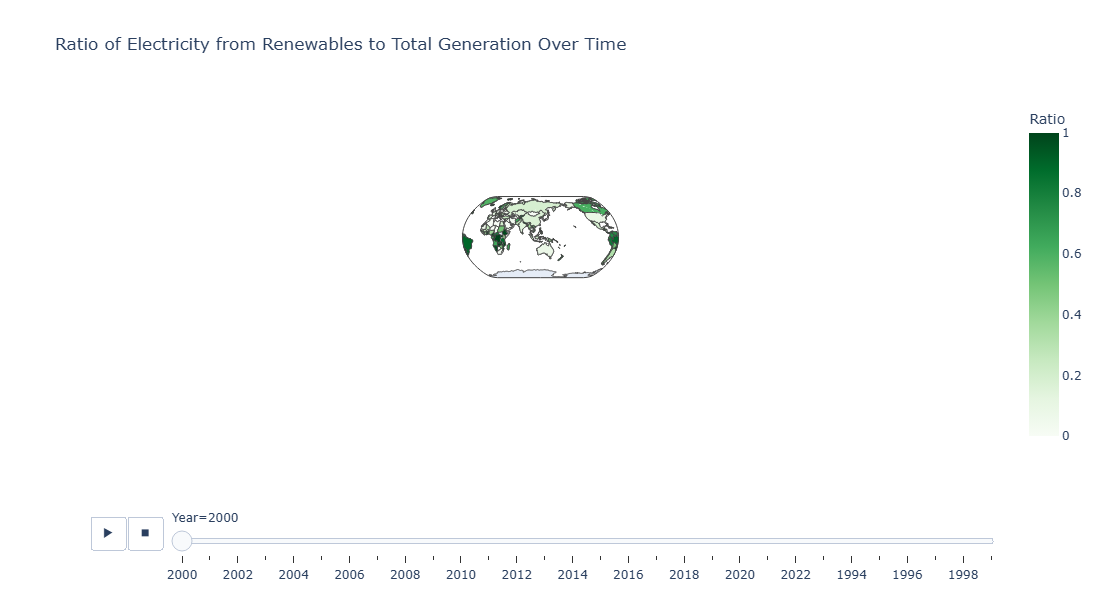

In [9]:
import plotly.express as px
fig = px.choropleth(filtered_electricity,
                    locations="Code",
                    color="Ratio",  # Use the calculated ratio for color
                    hover_name="Entity",
                    animation_frame="Year",  # Animate by year
                    color_continuous_scale="greens",  # Choose a color scale
                    projection="natural earth",
                    title='Ratio of Electricity from Renewables to Total Generation Over Time',
                    width=1000, 
                    height=600)

fig.show()

In [17]:
filtered_electricity.head()

Year Code         Entity  Electricity generation - TWh  \
0  2000  NaN  ASEAN (Ember)                        378.61   
1  2001  NaN  ASEAN (Ember)                        404.85   
2  2002  NaN  ASEAN (Ember)                        433.19   
3  2003  NaN  ASEAN (Ember)                        458.24   
4  2004  NaN  ASEAN (Ember)                        496.56   

   Electricity from renewables - TWh     Ratio  
0                              73.25  0.193471  
1                              77.19  0.190663  
2                              76.52  0.176643  
3                              76.40  0.166725  
4                              77.96  0.157000

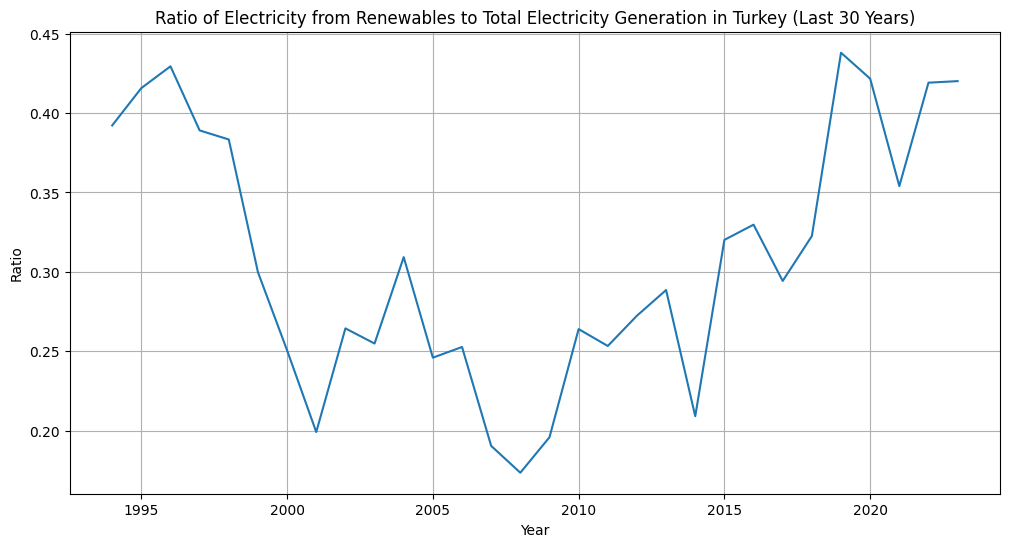

In [18]:
turkey_data = filtered_electricity[filtered_electricity['Entity'] == 'Turkey']

# Create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Ratio', data=turkey_data)
plt.title('Ratio of Electricity from Renewables to Total Electricity Generation in Turkey (Last 30 Years)')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()

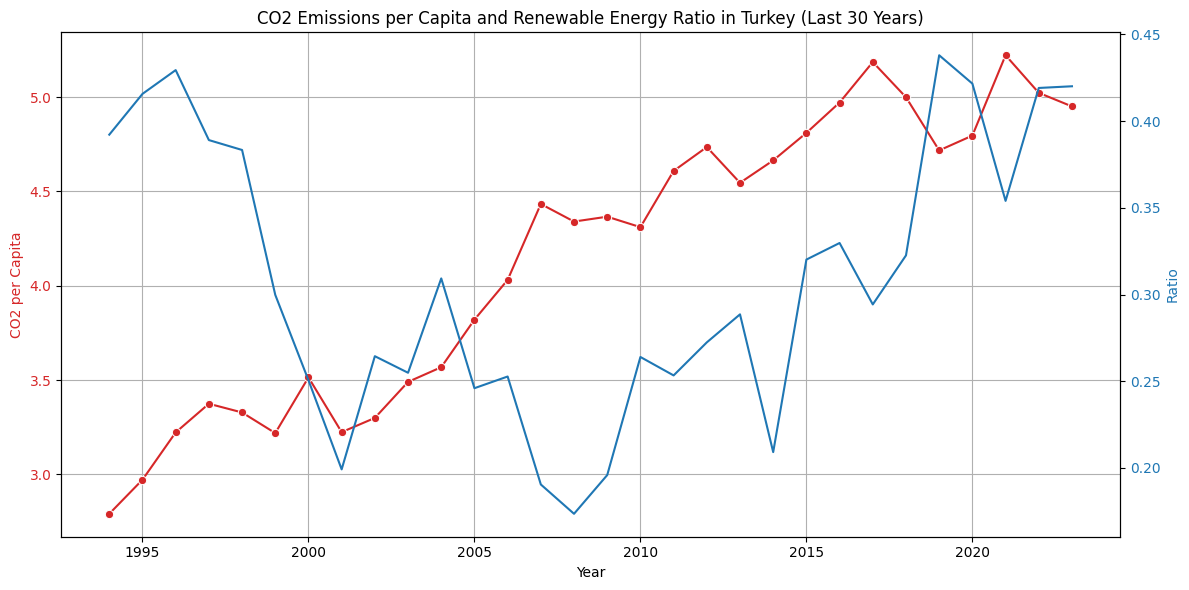

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 1: CO2 Emissions per Capita
turkey_co2_data = filtered_df[filtered_df['Entity'] == 'Turkey']
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 per Capita', color=color)
sns.lineplot(ax=ax1, x='Year', y='CO2 per capita', data=turkey_co2_data, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
# Plot 2: Ratio of Electricity from Renewables
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
turkey_electricity_data = filtered_electricity[filtered_electricity['Entity'] == 'Turkey']
color = 'tab:blue'
ax2.set_ylabel('Ratio', color=color)  # we already handled the x-label with ax1
sns.lineplot(ax=ax2, x='Year', y='Ratio', data=turkey_electricity_data, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('CO2 Emissions per Capita and Renewable Energy Ratio in Turkey (Last 30 Years)')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

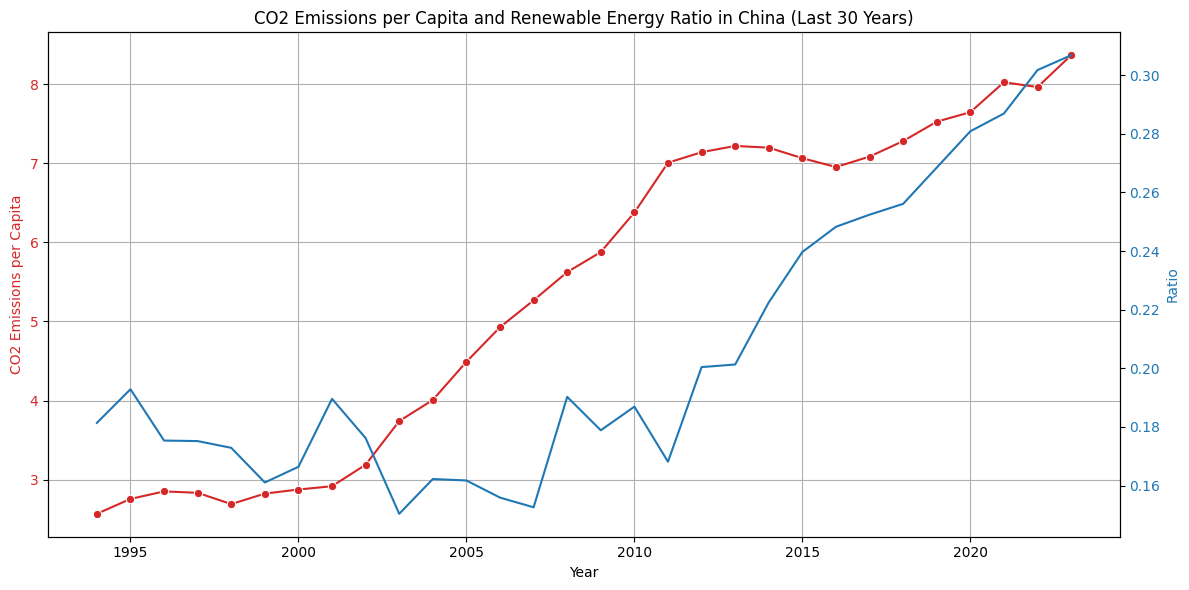

In [24]:
def plot_country_data(country_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot 1: CO2 Emissions per Capita
    country_co2_data = filtered_df[filtered_df['Entity'] == country_name]
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('CO2 Emissions per Capita', color=color)
    sns.lineplot(ax=ax1, x='Year', y='CO2 per capita', data=country_co2_data, marker='o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    # Plot 2: Ratio of Electricity from Renewables
    ax2 = ax1.twinx()
    country_electricity_data = filtered_electricity[filtered_electricity['Entity'] == country_name]
    color = 'tab:blue'
    ax2.set_ylabel('Ratio', color=color)
    sns.lineplot(ax=ax2, x='Year', y='Ratio', data=country_electricity_data, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'CO2 Emissions per Capita and Renewable Energy Ratio in {country_name} (Last 30 Years)')
    fig.tight_layout()
    plt.show()

# Call the function for China
plot_country_data('China')

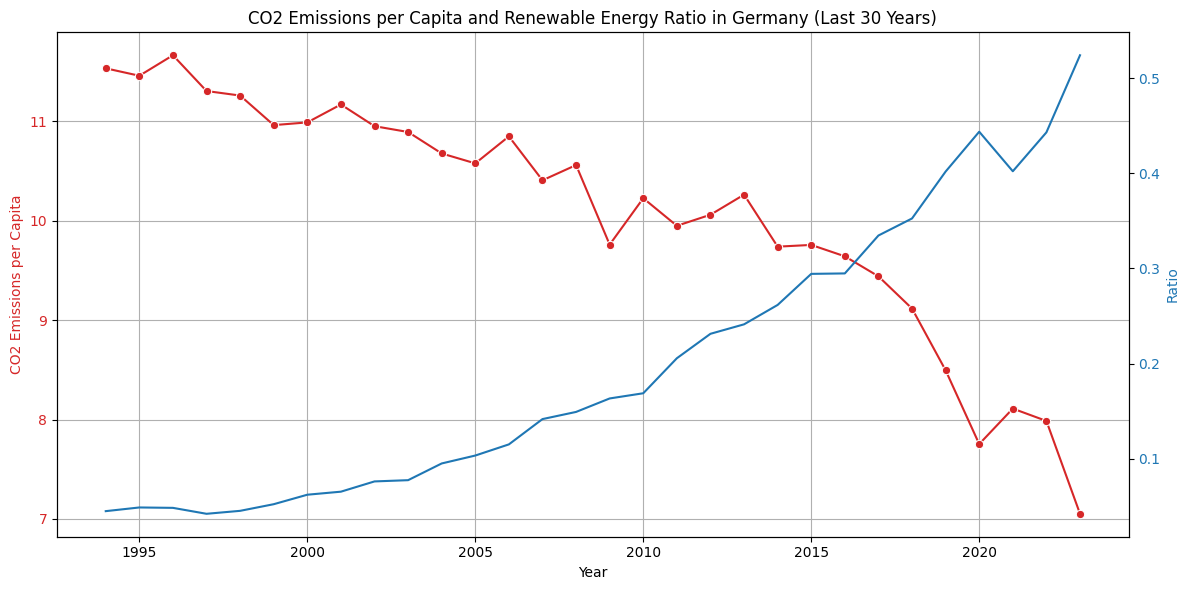

In [25]:
plot_country_data("Germany")

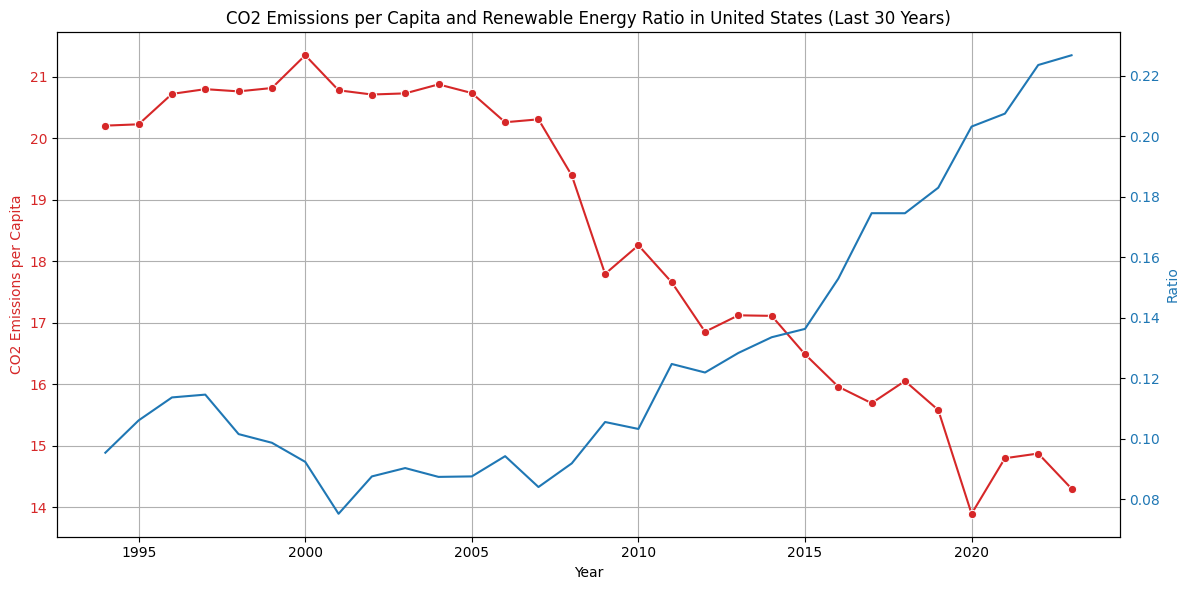

In [26]:
plot_country_data("United States")

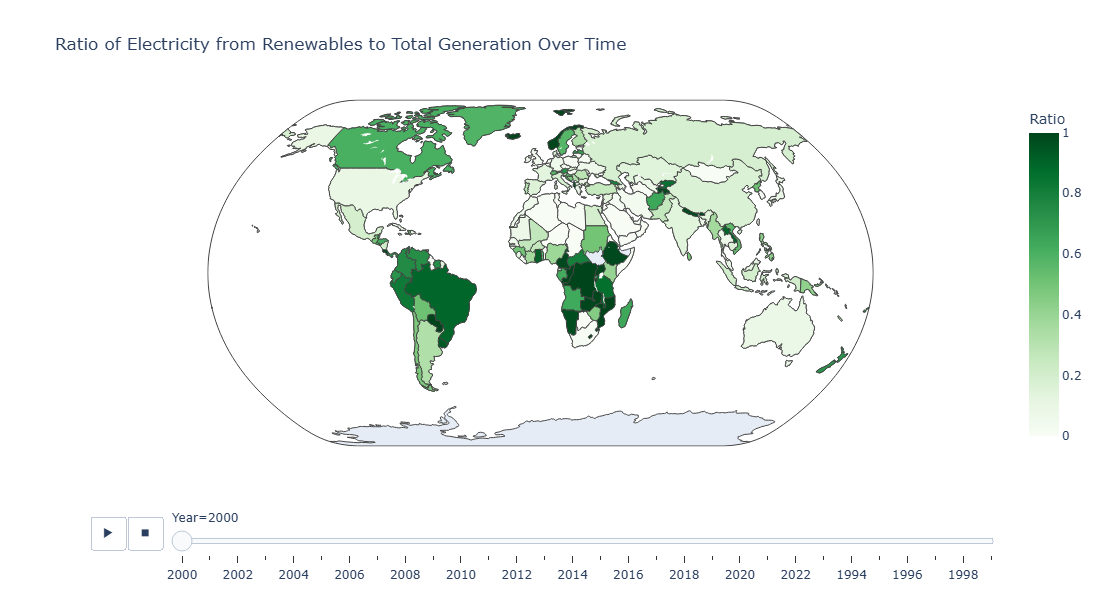

In [28]:
import plotly.express as px
fig = px.choropleth(filtered_electricity,
                    locations="Code",
                    color="Ratio",  # Use the calculated ratio for color
                    hover_name="Entity",
                    animation_frame="Year",  # Animate by year
                    color_continuous_scale="greens",  # Choose a color scale
                    projection="natural earth",
                    title='Ratio of Electricity from Renewables to Total Generation Over Time',
                    width=1000, 
                    height=600)

fig.show()

In [29]:
html_fig = fig.to_html(full_html=False)


In [30]:
print(html_fig)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [47]:
df = pd.merge(co2, population, on=["Entity", "Year"], how = "inner")
df.head()

Entity Code  Year  Annual CO₂ emissions  \
0  Afghanistan  AFG  1950               84272.0   
1  Afghanistan  AFG  1951               91600.0   
2  Afghanistan  AFG  1952               91600.0   
3  Afghanistan  AFG  1953              106256.0   
4  Afghanistan  AFG  1954              106256.0   

   Population - Sex: all - Age: all - Variant: estimates  
0                                            7776182      
1                                            7879343      
2                                            7987783      
3                                            8096703      
4                                            8207953

In [48]:
df["CO2 emissions per capita"] = df["Annual CO₂ emissions"]/df["Population - Sex: all - Age: all - Variant: estimates"]
df.head()

Entity Code  Year  Annual CO₂ emissions  \
0  Afghanistan  AFG  1950               84272.0   
1  Afghanistan  AFG  1951               91600.0   
2  Afghanistan  AFG  1952               91600.0   
3  Afghanistan  AFG  1953              106256.0   
4  Afghanistan  AFG  1954              106256.0   

   Population - Sex: all - Age: all - Variant: estimates  \
0                                            7776182       
1                                            7879343       
2                                            7987783       
3                                            8096703       
4                                            8207953       

   CO2 emissions per capita  
0                  0.010837  
1                  0.011625  
2                  0.011468  
3                  0.013123  
4                  0.012945

In [49]:
USA = df[df["Entity"] == "United States"]
USA.head()

Entity Code  Year  Annual CO₂ emissions  \
14538  United States  USA  1950          2.541485e+09   
14539  United States  USA  1951          2.618712e+09   
14540  United States  USA  1952          2.551220e+09   
14541  United States  USA  1953          2.612971e+09   
14542  United States  USA  1954          2.489462e+09   

       Population - Sex: all - Age: all - Variant: estimates  \
14538                                          154202683       
14539                                          156481322       
14540                                          158794225       
14541                                          161168319       
14542                                          163636304       

       CO2 emissions per capita  
14538                 16.481460  
14539                 16.734979  
14540                 16.066198  
14541                 16.212686  
14542                 15.213386

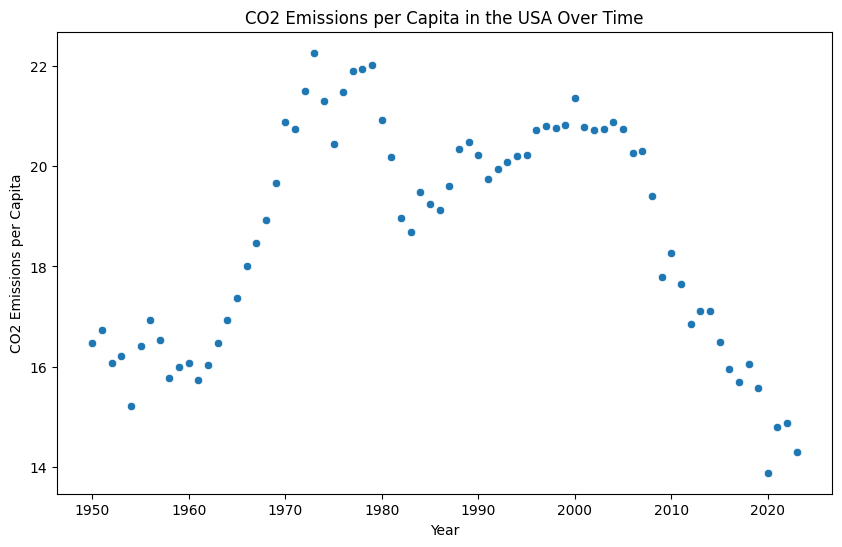

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='CO2 emissions per capita', data=USA)
plt.title('CO2 Emissions per Capita in the USA Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.show()

In [51]:
current_year = USA['Year'].max()
USA_last_62 = USA[USA['Year'] >= current_year - 62]
USA_last_62.head()

Entity Code  Year  Annual CO₂ emissions  \
14549  United States  USA  1961          2.886873e+09   
14550  United States  USA  1962          2.993902e+09   
14551  United States  USA  1963          3.126488e+09   
14552  United States  USA  1964          3.264314e+09   
14553  United States  USA  1965          3.399547e+09   

       Population - Sex: all - Age: all - Variant: estimates  \
14549                                          183489491       
14550                                          186724277       
14551                                          189825228       
14552                                          192819456       
14553                                          195653775       

       CO2 emissions per capita  
14549                 15.733178  
14550                 16.033812  
14551                 16.470348  
14552                 16.929379  
14553                 17.375320

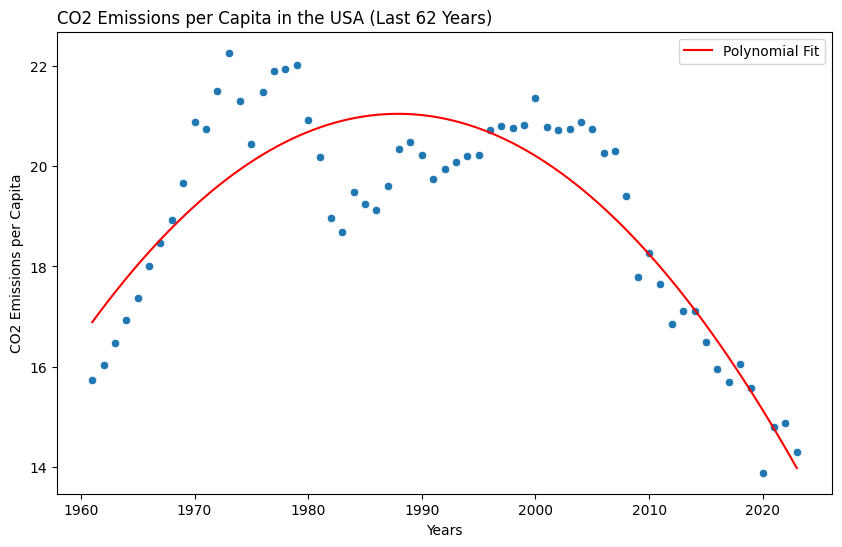

array([-5.73230812e-03,  2.27906245e+01, -2.26318142e+04])

In [52]:
coefficients = np.polyfit(USA_last_62['Year'], USA_last_62['CO2 emissions per capita'], 2)
polynomial = np.poly1d(coefficients)

# Generate x values for the polynomial line
x_values = np.linspace(USA_last_62['Year'].min(), USA_last_62['Year'].max(), 100)
y_values = polynomial(x_values)

# Plot the scatterplot for the last 62 years
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='CO2 emissions per capita', data=USA_last_62)

# Plot the polynomial line
plt.plot(x_values, y_values, color='red', label='Polynomial Fit')


plt.title('CO2 Emissions per Capita in the USA (Last 62 Years)', loc = "left")
plt.xlabel('Years')
plt.ylabel('CO2 Emissions per Capita')
plt.legend()
plt.show()

coefficients

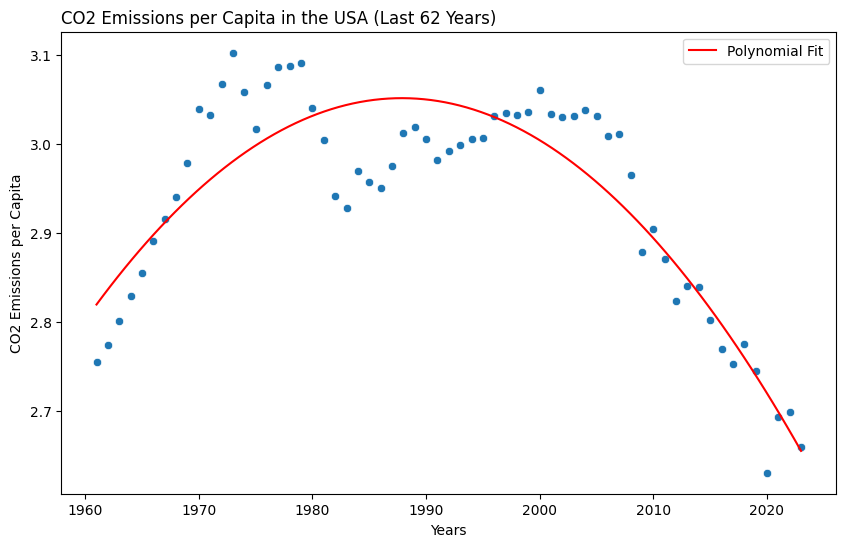

array([-3.20893581e-04,  1.27578928e+00, -1.26499980e+03])

In [76]:
coefficients = np.polyfit(USA_last_62['Year'], np.log(USA_last_62['CO2 emissions per capita']), 2)
polynomial = np.poly1d(coefficients)

# Generate x values for the polynomial line
x_values = np.linspace(USA_last_62['Year'].min(), USA_last_62['Year'].max(), 100)
y_values = polynomial(x_values)

# Plot the scatterplot for the last 62 years
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y=np.log(USA_last_62['CO2 emissions per capita']), data=USA_last_62)

# Plot the polynomial line
plt.plot(x_values, y_values, color='red', label='Polynomial Fit')


plt.title('CO2 Emissions per Capita in the USA (Last 62 Years)', loc = "left")
plt.xlabel('Years')
plt.ylabel('CO2 Emissions per Capita')
plt.legend()
plt.show()

coefficients

In [53]:
df.head()

Entity Code  Year  Annual CO₂ emissions  \
0  Afghanistan  AFG  1950               84272.0   
1  Afghanistan  AFG  1951               91600.0   
2  Afghanistan  AFG  1952               91600.0   
3  Afghanistan  AFG  1953              106256.0   
4  Afghanistan  AFG  1954              106256.0   

   Population - Sex: all - Age: all - Variant: estimates  \
0                                            7776182       
1                                            7879343       
2                                            7987783       
3                                            8096703       
4                                            8207953       

   CO2 emissions per capita  
0                  0.010837  
1                  0.011625  
2                  0.011468  
3                  0.013123  
4                  0.012945

In [54]:
USA_last_62.head()

Entity Code  Year  Annual CO₂ emissions  \
14549  United States  USA  1961          2.886873e+09   
14550  United States  USA  1962          2.993902e+09   
14551  United States  USA  1963          3.126488e+09   
14552  United States  USA  1964          3.264314e+09   
14553  United States  USA  1965          3.399547e+09   

       Population - Sex: all - Age: all - Variant: estimates  \
14549                                          183489491       
14550                                          186724277       
14551                                          189825228       
14552                                          192819456       
14553                                          195653775       

       CO2 emissions per capita  
14549                 15.733178  
14550                 16.033812  
14551                 16.470348  
14552                 16.929379  
14553                 17.375320

In [55]:
df2 = pd.merge( er, eg, on=["Entity", "Year", "Code"], how = "inner")
df2.head()

Entity Code  Year  Electricity from renewables - TWh  \
0  ASEAN (Ember)  NaN  2000                              73.25   
1  ASEAN (Ember)  NaN  2001                              77.19   
2  ASEAN (Ember)  NaN  2002                              76.52   
3  ASEAN (Ember)  NaN  2003                              76.40   
4  ASEAN (Ember)  NaN  2004                              77.96   

   Electricity generation - TWh  
0                        378.61  
1                        404.85  
2                        433.19  
3                        458.24  
4                        496.56

In [56]:
df2["Ratio"] = df2['Electricity from renewables - TWh']/df2["Electricity generation - TWh"]
df2.head()

Entity Code  Year  Electricity from renewables - TWh  \
0  ASEAN (Ember)  NaN  2000                              73.25   
1  ASEAN (Ember)  NaN  2001                              77.19   
2  ASEAN (Ember)  NaN  2002                              76.52   
3  ASEAN (Ember)  NaN  2003                              76.40   
4  ASEAN (Ember)  NaN  2004                              77.96   

   Electricity generation - TWh     Ratio  
0                        378.61  0.193471  
1                        404.85  0.190663  
2                        433.19  0.176643  
3                        458.24  0.166725  
4                        496.56  0.157000

In [57]:
df3 = pd.merge(USA_last_62, df2, on=["Entity", "Code", "Year"], how = "inner")
df3.head()

Entity Code  Year  Annual CO₂ emissions  \
0  United States  USA  1985          4.652938e+09   
1  United States  USA  1986          4.663711e+09   
2  United States  USA  1987          4.826013e+09   
3  United States  USA  1988          5.050858e+09   
4  United States  USA  1989          5.132544e+09   

   Population - Sex: all - Age: all - Variant: estimates  \
0                                          241690439       
1                                          243953810       
2                                          246161292       
3                                          248393235       
4                                          250675047       

   CO2 emissions per capita  Electricity from renewables - TWh  \
0                 19.251643                          323.59183   
1                 19.117189                          335.69507   
2                 19.605084                          298.08980   
3                 20.334123                          270.78876   
4                 20.474888                          325.96497   

   Electricity generation - TWh     Ratio  
0                     2657.1501  0.121782  
1                     2676.1130  0.125441  
2                     2772.2053  0.107528  
3                     2914.4458  0.092913  
4                     3155.4497  0.103302

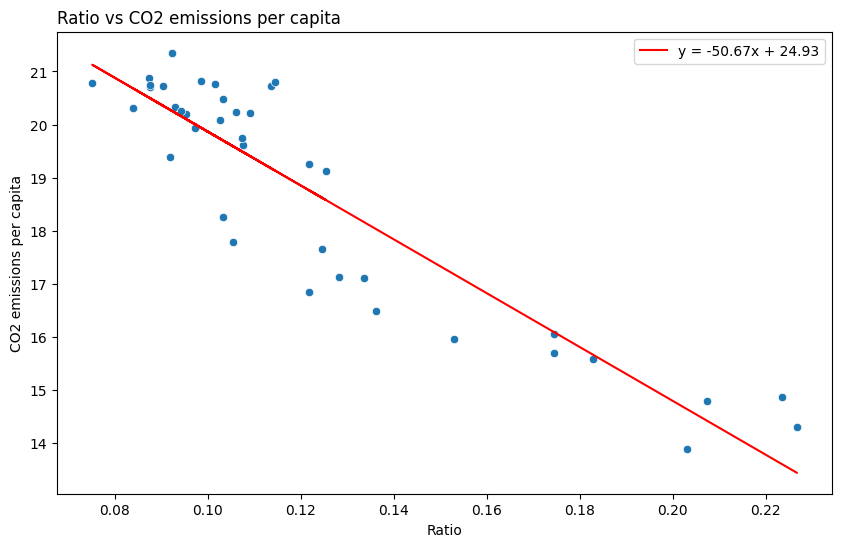

In [58]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df3['Ratio'], df3['CO2 emissions per capita'])


line_eq = f"y = {slope:.2f}x + {intercept:.2f}"


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x="Ratio", y="CO2 emissions per capita")


plt.plot(df3['Ratio'], slope * df3['Ratio'] + intercept, color='red', label=line_eq)

plt.title('Ratio vs CO2 emissions per capita', loc = "left")
plt.xlabel('Ratio')
plt.ylabel('CO2 emissions per capita')
plt.legend() 
plt.show()

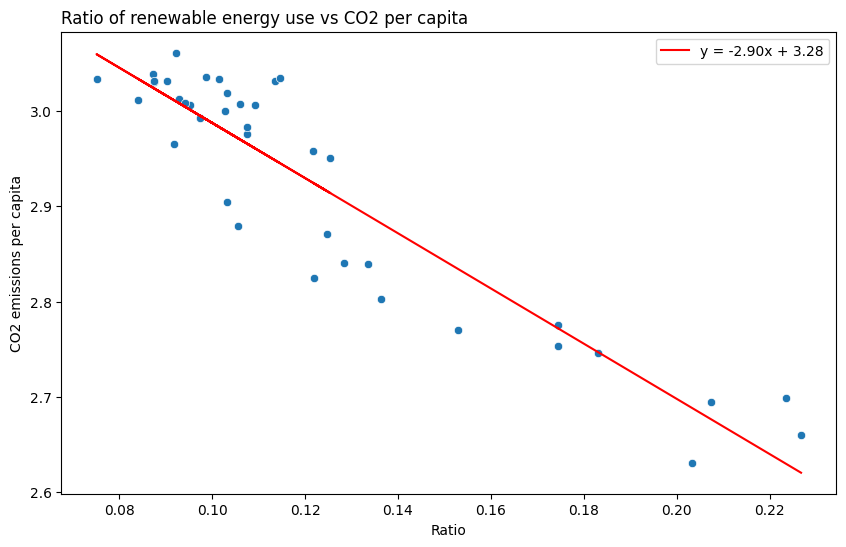

In [73]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df3['Ratio'], np.log(df3['CO2 emissions per capita']))


line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x="Ratio", y=np.log(df3[("CO2 emissions per capita")]))


plt.plot(df3['Ratio'], slope * df3['Ratio'] + intercept, color='red', label=line_eq)

plt.title('Ratio of renewable energy use vs CO2 per capita', loc = "left")
plt.xlabel('Ratio')
plt.ylabel('CO2 emissions per capita')
plt.legend() 
plt.show()

In [59]:
ecbysource = pd.read_csv("Datasets/energy-consumption-by-source-and-country.csv")
ecbysource.head()

Entity Code  Year  \
0  Africa  NaN  1971   
1  Africa  NaN  1972   
2  Africa  NaN  1973   
3  Africa  NaN  1974   
4  Africa  NaN  1975   

   Other renewables (including geothermal and biomass) - TWh  \
0                                           0.523521           
1                                           0.526714           
2                                           0.542675           
3                                           0.558636           
4                                           0.549059           

   Biofuels consumption - TWh  Solar consumption - TWh  \
0                         NaN                      0.0   
1                         NaN                      0.0   
2                         NaN                      0.0   
3                         NaN                      0.0   
4                         NaN                      0.0   

   Wind consumption - TWh  Hydro consumption - TWh  Nuclear consumption - TWh  \
0                     0.0                 76.92131                        0.0   
1                     0.0                 87.62504                        0.0   
2                     0.0                 92.68892                        0.0   
3                     0.0                105.46715                        0.0   
4                     0.0                111.53163                        0.0   

   Gas consumption - TWh  Coal consumption - TWh  Oil consumption - TWh  
0              18.405262               383.01230              474.30540  
1              24.670656               384.21082              510.72960  
2              39.551792               408.91030              549.80396  
3              44.518486               425.64618              569.73850  
4              53.638380               451.08047              597.67100

In [60]:
USAsources = ecbysource[ecbysource["Entity"] == "United States"]

USAsources.head()

Entity Code  Year  \
6601  United States  USA  1965   
6602  United States  USA  1966   
6603  United States  USA  1967   
6604  United States  USA  1968   
6605  United States  USA  1969   

      Other renewables (including geothermal and biomass) - TWh  \
6601                                          42.487560           
6602                                          44.817505           
6603                                          44.805830           
6604                                          49.461220           
6605                                          51.566704           

      Biofuels consumption - TWh  Solar consumption - TWh  \
6601                         NaN                      NaN   
6602                         NaN                      NaN   
6603                         NaN                      NaN   
6604                         NaN                      NaN   
6605                         NaN                      NaN   

      Wind consumption - TWh  Hydro consumption - TWh  \
6601                     NaN                588.36420   
6602                     NaN                591.21124   
6603                     NaN                671.88950   
6604                     NaN                674.65100   
6605                     NaN                757.07355   

      Nuclear consumption - TWh  Gas consumption - TWh  \
6601                  10.922040              4159.2060   
6602                  16.487183              4482.7560   
6603                  22.865034              4733.1885   
6604                  37.420605              5066.8150   
6605                  41.600470              5454.1070   

      Coal consumption - TWh  Oil consumption - TWh  
6601               3224.2441               6414.477  
6602               3380.8462               6731.245  
6603               3316.9966               6988.794  
6604               3433.0764               7457.961  
6605               3447.2375               7831.838

In [61]:
USAsources = USAsources.fillna(0)
USAsources.head()

Entity Code  Year  \
6601  United States  USA  1965   
6602  United States  USA  1966   
6603  United States  USA  1967   
6604  United States  USA  1968   
6605  United States  USA  1969   

      Other renewables (including geothermal and biomass) - TWh  \
6601                                          42.487560           
6602                                          44.817505           
6603                                          44.805830           
6604                                          49.461220           
6605                                          51.566704           

      Biofuels consumption - TWh  Solar consumption - TWh  \
6601                         0.0                      0.0   
6602                         0.0                      0.0   
6603                         0.0                      0.0   
6604                         0.0                      0.0   
6605                         0.0                      0.0   

      Wind consumption - TWh  Hydro consumption - TWh  \
6601                     0.0                588.36420   
6602                     0.0                591.21124   
6603                     0.0                671.88950   
6604                     0.0                674.65100   
6605                     0.0                757.07355   

      Nuclear consumption - TWh  Gas consumption - TWh  \
6601                  10.922040              4159.2060   
6602                  16.487183              4482.7560   
6603                  22.865034              4733.1885   
6604                  37.420605              5066.8150   
6605                  41.600470              5454.1070   

      Coal consumption - TWh  Oil consumption - TWh  
6601               3224.2441               6414.477  
6602               3380.8462               6731.245  
6603               3316.9966               6988.794  
6604               3433.0764               7457.961  
6605               3447.2375               7831.838

In [62]:
sumofrenewablesources = USAsources.apply(lambda x: x["Other renewables (including geothermal and biomass) - TWh"] + x["Biofuels consumption - TWh"] + x["Solar consumption - TWh"] + x["Wind consumption - TWh"] + x["Hydro consumption - TWh"], axis=1)
sumofrenewablesources.head()

6601    630.851760
6602    636.028745
6603    716.695330
6604    724.112220
6605    808.640254
dtype: float64

In [63]:
sumofothersources = USAsources.apply(lambda x: x["Nuclear consumption - TWh"] + x["Oil consumption - TWh"] + x["Coal consumption - TWh"] + x["Gas consumption - TWh"], axis=1)
sumofothersources.head()

6601    13808.849140
6602    14611.334383
6603    15061.844134
6604    15995.273005
6605    16774.782970
dtype: float64

In [64]:
df4 = pd.concat([USAsources, sumofrenewablesources, sumofothersources], axis=1)
df4.head()

Entity Code  Year  \
6601  United States  USA  1965   
6602  United States  USA  1966   
6603  United States  USA  1967   
6604  United States  USA  1968   
6605  United States  USA  1969   

      Other renewables (including geothermal and biomass) - TWh  \
6601                                          42.487560           
6602                                          44.817505           
6603                                          44.805830           
6604                                          49.461220           
6605                                          51.566704           

      Biofuels consumption - TWh  Solar consumption - TWh  \
6601                         0.0                      0.0   
6602                         0.0                      0.0   
6603                         0.0                      0.0   
6604                         0.0                      0.0   
6605                         0.0                      0.0   

      Wind consumption - TWh  Hydro consumption - TWh  \
6601                     0.0                588.36420   
6602                     0.0                591.21124   
6603                     0.0                671.88950   
6604                     0.0                674.65100   
6605                     0.0                757.07355   

      Nuclear consumption - TWh  Gas consumption - TWh  \
6601                  10.922040              4159.2060   
6602                  16.487183              4482.7560   
6603                  22.865034              4733.1885   
6604                  37.420605              5066.8150   
6605                  41.600470              5454.1070   

      Coal consumption - TWh  Oil consumption - TWh           0             1  
6601               3224.2441               6414.477  630.851760  13808.849140  
6602               3380.8462               6731.245  636.028745  14611.334383  
6603               3316.9966               6988.794  716.695330  15061.844134  
6604               3433.0764               7457.961  724.112220  15995.273005  
6605               3447.2375               7831.838  808.640254  16774.782970

In [65]:
df4.columns = ['Entity', 'Code', 'Year', "Other Renewables", "Biofuels", "Solar", "Wind", "Hydro", "Nuclear", "Gas", "Coal", "Oil", "SumofRenewables", "SumofOthers"]
df4.head()

Entity Code  Year  Other Renewables  Biofuels  Solar  Wind  \
6601  United States  USA  1965         42.487560       0.0    0.0   0.0   
6602  United States  USA  1966         44.817505       0.0    0.0   0.0   
6603  United States  USA  1967         44.805830       0.0    0.0   0.0   
6604  United States  USA  1968         49.461220       0.0    0.0   0.0   
6605  United States  USA  1969         51.566704       0.0    0.0   0.0   

          Hydro    Nuclear        Gas       Coal       Oil  SumofRenewables  \
6601  588.36420  10.922040  4159.2060  3224.2441  6414.477       630.851760   
6602  591.21124  16.487183  4482.7560  3380.8462  6731.245       636.028745   
6603  671.88950  22.865034  4733.1885  3316.9966  6988.794       716.695330   
6604  674.65100  37.420605  5066.8150  3433.0764  7457.961       724.112220   
6605  757.07355  41.600470  5454.1070  3447.2375  7831.838       808.640254   

       SumofOthers  
6601  13808.849140  
6602  14611.334383  
6603  15061.844134  
6604  15995.273005  
6605  16774.782970

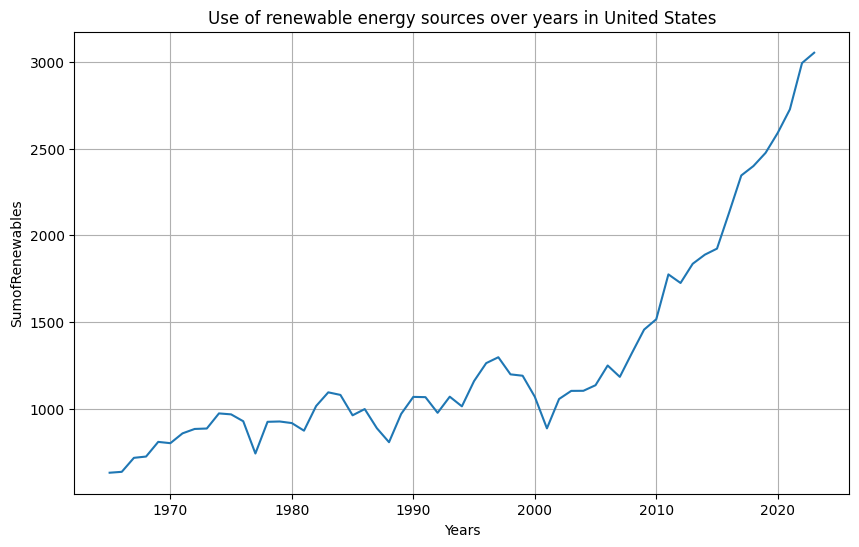

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(df4['Year'], df4['SumofRenewables'])
plt.xlabel('Years')
plt.ylabel('SumofRenewables')
plt.title('Use of renewable energy sources over years in United States')
plt.grid()
plt.show()